<a href="https://colab.research.google.com/github/pejmanrasti/EPU_ML_Angers_2025/blob/main/Jour_3/1_alzheimer_detection_and_classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Alzheimer Detection and Classifier

## 1. Problem Definition
> Alzheimer est le plus connu pour les causes de la démence. Il représente les deux tiers de la population totale de la démence, alors que la cause est encore inconnue. Selon des articles de Lancet Neurology, même l'ancienne théorie comme les inflammations neurales, qui était considérée comme moins importante que les protéines tau, les bêta-amyloïdes et les facteurs génétiques (Apo E4).

Avant de commencer, je dois expliquer un peu plus sur Alzheimer, car les données contiennent 4 classes d'Alzheimer qui dépendent de la gravité de la démence.

Il y a des degrés de gravité dans l'Alzheimer.

1. Très légèrement dément : C'est le stade où le patient commence à oublier où il a mis ses affaires, les noms des autres personnes récemment, etc. Il est difficile de le détecter par un test de capacité cognitive.
2. Légèrement dément : C'est le stade où les patients ne se souviennent pas des mots, ne trouvent pas leur chemin vers la destination, perdent la concentration et les capacités de travail. C'est aussi le stade où les patients oublient même qu'ils perdent la mémoire. À partir de ce stade, avec des tests cognitifs, cela peut être détecté.
3. Modérément dément : Commence à oublier les activités récentes, d'importantes histoires anciennes, a du mal à calculer le budget, à sortir seul et perd de l'empathie.
Il y a 3 autres stades dans la démence modérée, qui, au stade terminal, le patient ne peut plus se déplacer seul, tout en perdant la capacité de parler. Mais je suppose que l'ensemble de données actuel de Kaggle [https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset] considère tous ces stades fusionnés sous 'Modérément dément' ou même pas considérés.

Connaître ces stades est important car plus le stade du patient est avancé, plus le traitement aura un effet important en termes de ralentissement du processus. Si la démence est découverte pendant le stade modérément dément, on sait que le patient décédera dans les 3 ans. (Un des cas signalés est un guitariste rythmique Malcolm du groupe AC/DC, diagnostiqué d'une démence sévère en 2014.)

Ainsi, avoir une IA qui détecte la démence d'Alzheimer à un stade précoce peut permettre une espérance de vie plus longue pour le patient ainsi qu'une meilleure qualité de vie globale grâce au ralentissement de la démence.

Comme Alzheimer peut non seulement être détecté par des tests de capacité cognitive, mais aussi par IRM ou CT en regardant les ventricules du cerveau et l'atrophie corticale, le fondement théorique de ce projet est solide. Les médecins trouvent que les patients atteints d'Alzheimer ont un cerveau qui a des ventricules agrandis (qui se trouvent au centre du cerveau) ainsi qu'une zone corticale grise plus mince.

## 2. Spécification de la Solution
Ce projet va explorer divers modèles de ML allant du basique (Analyse en Composantes Principales (ACP), Analyse Discriminante Linéaire (ADL), Machine à Vecteurs de Support avec 3 noyaux différents commençant par linéaire jusqu'au noyau RBF, et enfin les modèles de Réseau Neuronal Convolutif VGG16 pour la Détection et EfficientNetB0 pour la Classification) pour voir quel type fonctionne le mieux.

Ce projet contiendra 2 sections principales. Détection de l'Alzheimer et Classification de l'Alzheimer. Les modèles de détection (ACP, SVM, ADL, VGG16) feront des jugements sur les données de test pour voir si l'image cérébrale de cette personne montre des signes d'Alzheimer.

D'autre part, la Classification de l'Alzheimer sera réalisée en entraînant les données avec différentes sévérités pour Alzheimer. En fait, c'est ainsi que les données originales sont créées, et ce modèle peut également être utilisé comme détecteur. Comme le modèle de ML fournira le stade auquel se trouve le patient, il peut être utilisé comme un outil de support pour les médecins pour diagnostiquer la maladie d'Alzheimer. Il apporte une certaine lumière dans le monde pratique car il peut détecter les premiers stades de la MA, ce qui peut augmenter l'espérance de vie ainsi qu'améliorer la qualité de vie avec des traitements de soutien.

Résumé : Je vais essayer de mettre en œuvre divers modèles pour la détection de l'Alzheimer (non vs avec Alzheimer) ainsi que pour la Classification de l'Alzheimer (non vs très léger vs léger vs modéré).

Préparer les données de deux manières différentes.

1. Détection de l'Alzheimer : Déterminer si le patient a l'Alzheimer ou non (non vs toutes les autres catégories)
2. Classificateur de l'Alzheimer : Définir à quel stade le patient se trouve dans l'Alzheimer.
La modèles qui vont être testés ici sont


* SVM pour la Détection de l'Alzheimer et le Classificateur de l'Alzheimer


In [1]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()

In [2]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [3]:
!unzip /content/gdrive/MyDrive/Formation_ICO/Jour3/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Non_Demented/non_2057.jpg  
  inflating: __MACOSX/Non_Demented/._non_2057.jpg  
  inflating: Non_Demented/non_2731.jpg  
  inflating: __MACOSX/Non_Demented/._non_2731.jpg  
  inflating: Non_Demented/non_1238.jpg  
  inflating: __MACOSX/Non_Demented/._non_1238.jpg  
  inflating: Non_Demented/non_2725.jpg  
  inflating: __MACOSX/Non_Demented/._non_2725.jpg  
  inflating: Non_Demented/non_2043.jpg  
  inflating: __MACOSX/Non_Demented/._non_2043.jpg  
  inflating: Non_Demented/non_1562.jpg  
  inflating: __MACOSX/Non_Demented/._non_1562.jpg  
  inflating: Non_Demented/non_1204.jpg  
  inflating: __MACOSX/Non_Demented/._non_1204.jpg  
  inflating: Non_Demented/non_2719.jpg  
  inflating: __MACOSX/Non_Demented/._non_2719.jpg  
  inflating: Non_Demented/non_1210.jpg  
  inflating: __MACOSX/Non_Demented/._non_1210.jpg  
  inflating: Non_Demented/non_1576.jpg  
  inflating: __MACOSX/Non_Demented/._non_1576.jpg  
  inflating: Non_De

In [4]:
#Dataset that should go with Alzheimer label
very_mild = glob('Very_Mild_Demented/*')
mild = glob('Mild_Demented/*')
moderate = glob('Moderate_Demented/*')

#Dataset without Alzheimer
non = glob('Non_Demented/*')

Non_Demented/non_2532.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
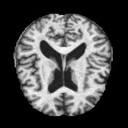

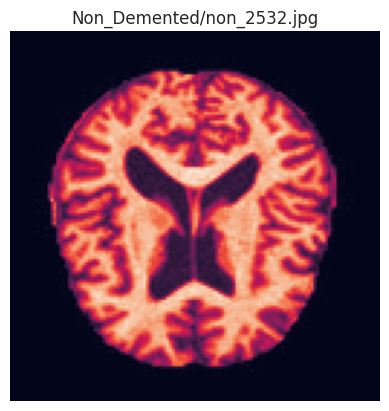

In [5]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
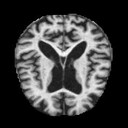

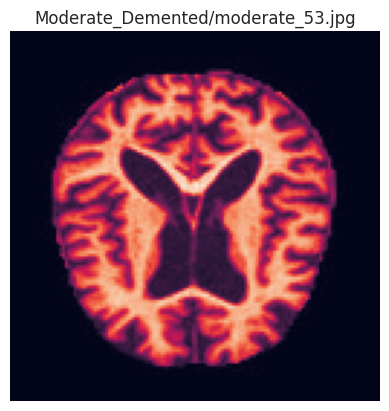

In [6]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

## 3. Testing and Analysis
## 3.1 Alzheimer Detection Models

### SVM for Alzheimer Detection

In [10]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 128
height = 128
new_size = (width,height) #the data is just black to white

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)



In [11]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


3200
3200
6400
[0 0 0 ... 0 0 0]


In [12]:
#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2549    0]
 [   0 2571]]
Accuracy :  0.97734375
Precision :  0.9838709677419355
Recall :  0.9697933227344993
f1 :  0.9767814251401121
Confusion matrix : [[641  10]
 [ 19 610]]


In [13]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.893359375
Precision :  0.8836680560818492
Recall :  0.9070400622325944
f1 :  0.8952015355086372
Confusion matrix : [[2242  307]
 [ 239 2332]]
Accuracy :  0.85390625
Precision :  0.836890243902439
Recall :  0.8728139904610492
f1 :  0.8544747081712062
Confusion matrix : [[544 107]
 [ 80 549]]


In [ ]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.866796875
Precision :  0.8514071294559099
Recall :  0.8880626223091976
f1 :  0.8693486590038313
Confusion matrix : [[2169  396]
 [ 286 2269]]
Accuracy :  0.8328125
Precision :  0.8082975679542204
Recall :  0.875968992248062
f1 :  0.8407738095238096
Confusion matrix : [[501 134]
 [ 80 565]]


Déjà avec le noyau linéaire du SVM, la performance du modèle est très prometteuse. Considérant que ce modèle n'est pas de ceux dits 'à la pointe de la technologie', il a néanmoins une performance remarquable.

Étonnamment, à mesure que le noyau se complexifie, la performance globale ne s'améliore pas nécessairement. Cela peut être la raison pour laquelle il est très facile de distinguer si quelqu'un a 'Alzheimer' ou non en regardant l'épaisseur de la matière grise et la taille des ventricules, ce qui ne nécessite pas de techniques de noyau complexes.

Cependant, à ce stade, c'est juste un 'détecteur d'Alzheimer' et non un 'classificateur d'Alzheimer', puisque les données originales sont une variable catégorielle. Donc, lorsque je commencerai à conduire le classificateur d'Alzheimer, un noyau plus complexe pourrait être préférable à une simple astuce de noyau linéaire.

### SVM pour la classification de l'Alzheimer

In [ ]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 128
height = 128
new_size = (width,height) #the data is just black to white

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

In [ ]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))


In [ ]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))